In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv(r"C:\Users\HP\CodeAlpha_Unemployment_Analysis\unemployment analysis.csv")

df.head()


,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,...,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  235 non-null    object 
 1   Country Code  235 non-null    object 
 2   1991          235 non-null    float64
 3   1992          235 non-null    float64
 4   1993          235 non-null    float64
 5   1994          235 non-null    float64
 6   1995          235 non-null    float64
 7   1996          235 non-null    float64
 8   1997          235 non-null    float64
 9   1998          235 non-null    float64
 10  1999          235 non-null    float64
 11  2000          235 non-null    float64
 12  2001          235 non-null    float64
 13  2002          235 non-null    float64
 14  2003          235 non-null    float64
 15  2004          235 non-null    float64
 16  2005          235 non-null    float64
 17  2006          235 non-null    float64
 18  2007          235 non-null    

In [8]:
df.columns


Index(['Country Name', 'Country Code', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [10]:
df_long = df.melt(
    id_vars=['Country Name', 'Country Code'],
    var_name='Year',
    value_name='Unemployment_Rate'
)

df_long.head()


,Country Name,Country Code,Year,Unemployment_Rate
0,Africa Eastern and Southern,AFE,1991,7.80
1,Afghanistan,AFG,1991,10.65
2,Africa Western and Central,AFW,1991,4.42
3,Angola,AGO,1991,4.21
4,Albania,ALB,1991,10.31


In [11]:
df_long['Year'] = df_long['Year'].astype(int)


In [12]:
df_long.isnull().sum()


Country Name         0
Country Code         0
Year                 0
Unemployment_Rate    0
dtype: int64

In [13]:
df_long.dropna(inplace=True)


In [14]:
df_long.isnull().sum()

Country Name         0
Country Code         0
Year                 0
Unemployment_Rate    0
dtype: int64

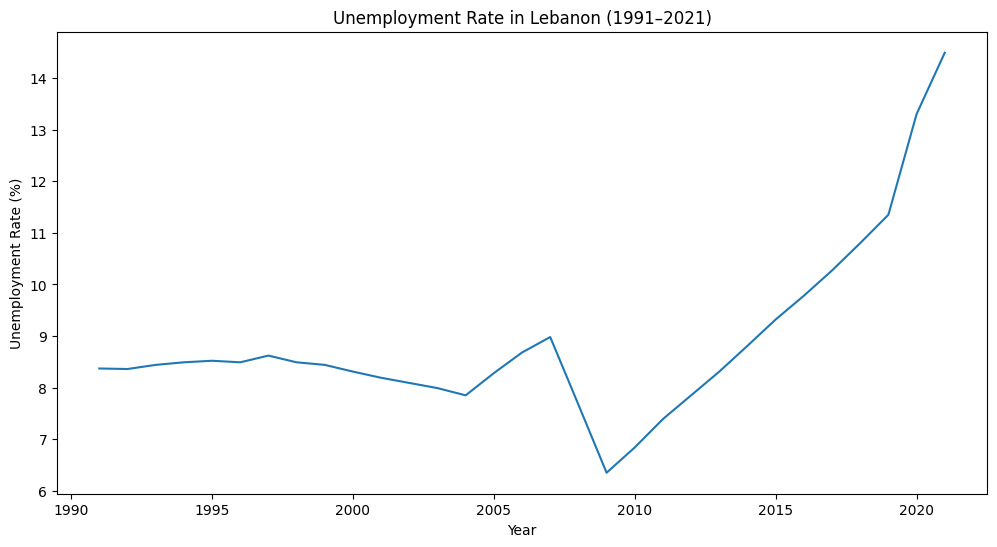

In [16]:
india = df_long[df_long['Country Name'] == 'Lebanon']

plt.figure(figsize=(12,6))
plt.plot(india['Year'], india['Unemployment_Rate'])
plt.title("Unemployment Rate in Lebanon (1991–2021)")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.show()


In [22]:
lebanon = df_long[df_long['Country Name'] == 'Lebanon']


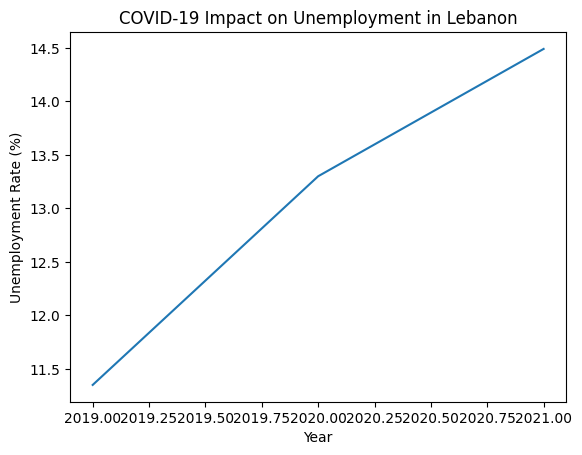

In [23]:
covid = lebanon[lebanon['Year'] >= 2019]

sns.lineplot(data=covid, x='Year', y='Unemployment_Rate')
plt.title("COVID-19 Impact on Unemployment in Lebanon")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.show()


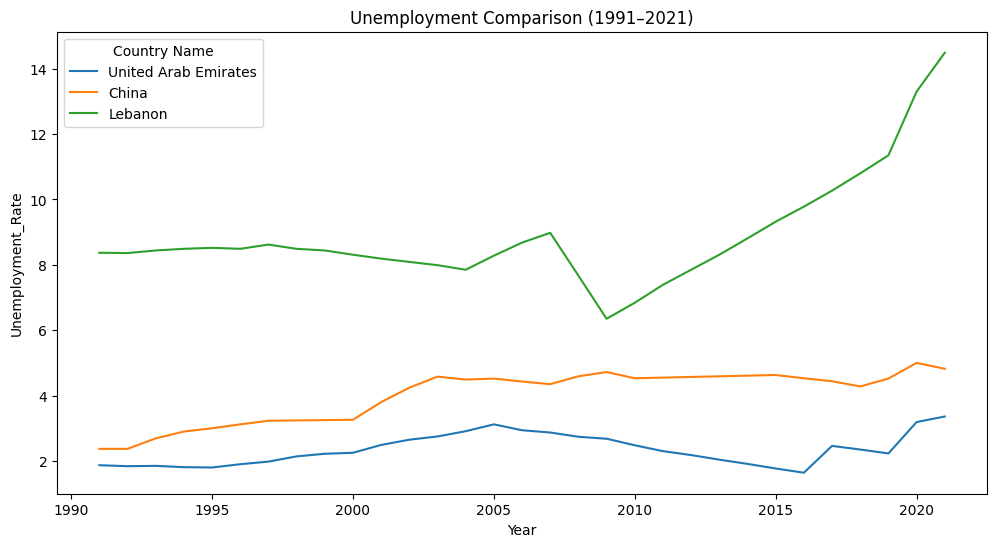

In [25]:
countries = ['Lebanon', 'United Arab Emirates', 'China']
subset = df_long[df_long['Country Name'].isin(countries)]

plt.figure(figsize=(12,6))
sns.lineplot(data=subset, x='Year', y='Unemployment_Rate', hue='Country Name')
plt.title("Unemployment Comparison (1991–2021)")
plt.show()


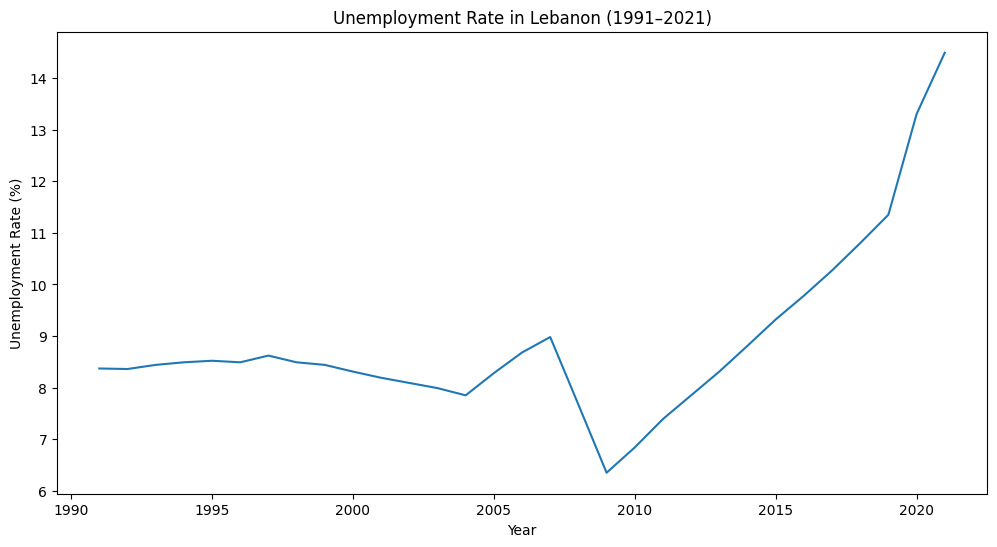

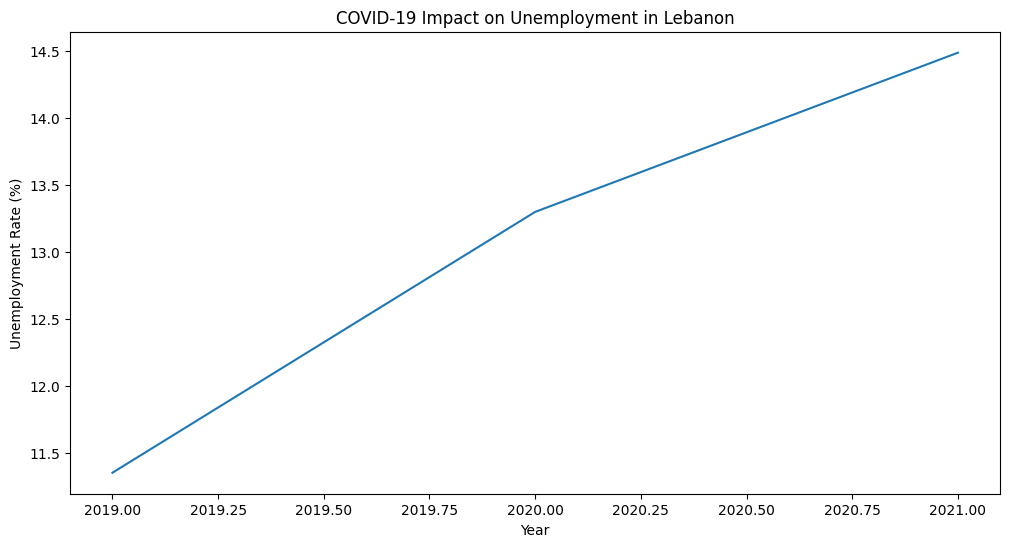

In [43]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure results folder exists
folder = r"C:\Users\HP\CodeAlpha_Unemployment_Analysis\results"
if not os.path.exists(folder):
    os.makedirs(folder)

# Lebanon full trend (1991-2021)
plt.figure(figsize=(12,6))
sns.lineplot(data=lebanon, x='Year', y='Unemployment_Rate')
plt.title("Unemployment Rate in Lebanon (1991–2021)")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.savefig(os.path.join(folder, "lebanon_unemployment_trend.png"))
plt.show()

# Lebanon COVID-19 impact (2019-2021)
covid = lebanon[lebanon['Year'] >= 2019]
plt.figure(figsize=(12,6))
sns.lineplot(data=covid, x='Year', y='Unemployment_Rate')
plt.title("COVID-19 Impact on Unemployment in Lebanon")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.savefig(os.path.join(folder, "lebanon_covid_impact.png"))
plt.show()
